# Labeled Component Unfolding (LCU)

O algoritmo LCU é um sistema dinâmico que pode ser aplicado numa rede complexa para resolver problemas semi-supervisionados. Seu funcionamento espelha-se em comportamentos da natureza e sistemas sociais, como sobrevivência, competição por recursos, exploração territorial e campanhas de eleição.

O autor desse algoritmo é brasileiro, Dr. Filipe Verri (ITA), sendo publicado como um artigo no IEEE (2016) e componente da sua tese de doutorado *Collective dynamics in complex networks for machine learning* (2018).

Diferentes de modelos de machine learning mais conhecidos, indutivos, onde há uma etapa prévia de aprendizado e então outra de predição, este algoritmo é classificado **transdutivo**: o aprendizado ocorre de maneira indireta enquanto a predição é feita! Ocorre uma etapa única, iterativa, de classificação.

Nessa camada de resolução do problema de segmentação de imagem, já precisamos ter uma rede complexa formada, neste caso através de superpixels e extração de características para calcular o peso das arestas.

In [1]:
import os
os.environ["LOGURU_LEVEL"] = "TRACE"
import random
import networkx as nx
from egsis import EGSIS
from egsis import LCU


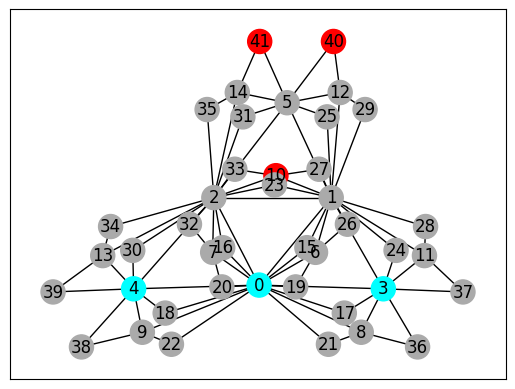

In [2]:

G = nx.dorogovtsev_goltsev_mendes_graph(4)
labels = {
    41: 2,
    40: 2,
    10: 2,
    0: 1,
    4: 1,
    3: 1
}
class_by_color = {
    1: "#00ffff", # cyan
    2: "#ff0000" # red
}
default = "#aaaaaa"
color_map = [class_by_color.get(labels.get(node), default)
             for node in G.nodes]
for node in G.nodes():
    G.nodes[node]["label"] = labels.get(node, 0)
    
for edge in G.edges:
    G.edges[edge]["weight"] = 1
    
nx.draw_networkx(G, node_color=color_map, pos=nx.spectral_layout(G))

In [3]:
lcu = LCU(n_classes=2, max_iter=100)
sub_networks = lcu.fit_predict(G)
[g.remove_nodes_from(list(nx.isolates(g))) for g in sub_networks]

2022-12-23 01:35:35.358 | INFO     | egsis.lcu:__init__:90 - hyperparams: n_classes=2, competition_level=1, max_iter=100
2022-12-23 01:35:35.397 | DEBUG    | egsis.lcu:n0:224 - n0: classes=2, shape=(2, 42)
2022-12-23 01:35:35.400 | INFO     | egsis.lcu:n0:231 - n0: [[9.87654321 0.         0.         4.9382716  4.9382716  0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         4.9382716  0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0. 

[None, None]

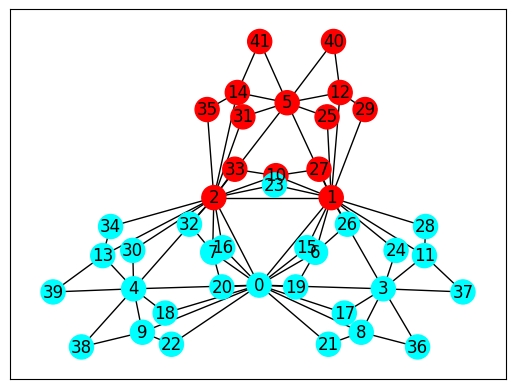

In [4]:
labels = {}
for label in [1, 2]:
    for node in sub_networks[label - 1].nodes:
            labels[node] = label

color_map = [class_by_color.get(labels.get(node), default)
             for node in G.nodes]

nx.draw_networkx(G, node_color=color_map,  pos=nx.spectral_layout(G))

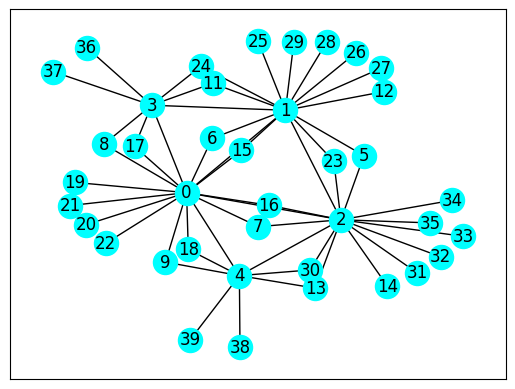

In [5]:
sub_id = 0
g = sub_networks[sub_id]
nx.draw_networkx(g, node_color=class_by_color[sub_id+1])

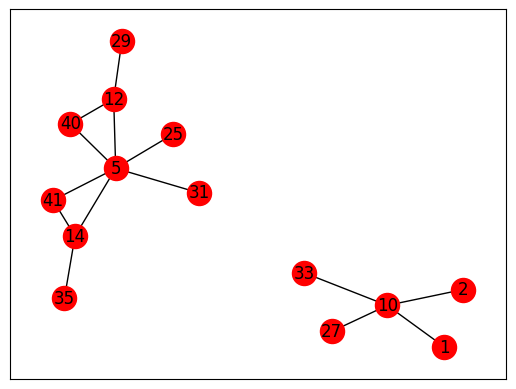

In [6]:
sub_id = 1
g = sub_networks[sub_id]
nx.draw_networkx(g, node_color=class_by_color[sub_id+1])

In [7]:
for g in sub_networks:
    print(g.edges)

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 6), (0, 7), (0, 8), (0, 9), (0, 15), (0, 16), (0, 17), (0, 18), (0, 19), (0, 20), (0, 21), (0, 22), (1, 2), (1, 3), (1, 5), (1, 6), (1, 11), (1, 12), (1, 15), (1, 23), (1, 24), (1, 25), (1, 26), (1, 27), (1, 28), (1, 29), (2, 4), (2, 5), (2, 7), (2, 13), (2, 14), (2, 16), (2, 23), (2, 30), (2, 31), (2, 32), (2, 33), (2, 34), (2, 35), (3, 8), (3, 11), (3, 17), (3, 24), (3, 36), (3, 37), (4, 9), (4, 13), (4, 18), (4, 30), (4, 38), (4, 39)]
[(1, 10), (2, 10), (5, 12), (5, 14), (5, 25), (5, 31), (5, 40), (5, 41), (10, 27), (10, 33), (12, 29), (12, 40), (14, 35), (14, 41)]


In [8]:
lcu.delta.shape

(2, 42, 42)

In [9]:
(lcu.delta[:, 0, 0] + lcu.delta[:, 0, 0])

array([0., 0.])

In [10]:
lcu

In [11]:
G_pred = lcu.classify_vertexes(sub_networks)
G_pred

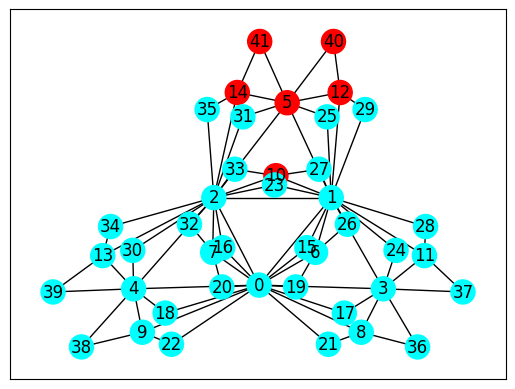

In [14]:
color_map = [class_by_color.get(G_pred.nodes.get(node)["label"], default)
             for node in G_pred.nodes]

nx.draw_networkx(G_pred, node_color=color_map,  pos=nx.spectral_layout(G_pred))